# Mundo del laberinto con tráfico

Para comparar los algoritmos de búsqueda informada conviene definir un problema que cuente con una función de costo.
El problema que aquí definiremos es el problema del laberinto: que un agente, iniciando de un punto arbitrario de un mapa, pueda llegar a una meta o punto final marcado en el mapa; además, introducimos un nuevo factor para determinar el costo de cada acción en un estado dado. Este nuevo factor puede verse como el "tráfico": así, moverse a ciertas regiones del laberinto le costará más al agente que moverse hacia otras. En particular definimos 3 tipos de costo:

1. Tráfico pesado: son regiones en que el costo de moverse es de 3.
2. Tráfico ligero: son regiones en que el costo de moverse es de 2.
3. No tráfico: son regiones en el que el costo de moverse es de 1.

En una aplicación real, se podría considerar el promedio de tiempo de transitar por estas regiones, si se cuenta con esta información. En este caso simplificamos el proceso tomando en cuenta estos valores. 

Para incluir el costo dentro del modelo simplemente definimos una función de costo que tome en cuenta estos valores de tráfico. Estos valores se toman de un mapa que representamos como cadena de texto; cada valor de tráfico se representa con un símbolo textual:

1. Tráfico pesado: símbolo '-' (guión)
2. Tráfico ligero: símbolo '.' (punto)
3. No tráfico: símbolo ' ' (espacio)

In [1]:
class Maze(object):
    """Simulador de laberinto"""
    def __init__(self, board):
        #Define el laberinto
        self.board = [list(x) for x in board.split("\n") if x]
        #Guardo el estado inicial
        self.goal = None
        
        for y in range(len(self.board)):
            for x in range(len(self.board[y])):
                if self.board[y][x] == 'o':
                    #El inicial es el estado con el símbolo 'o'
                    self.initial = (x,y)
                elif self.board[y][x] == 'x':
                    #La meta es el estado con el símbolo 'x'
                    self.goal = (x,y)
                    
    def __str__(self):
        return '\n'.join([''.join(symbols) for symbols in self.board])
        
    def actions(self, state):
        """Define las posibles acciones permitidas en cada estado"""
        actions = []
        for action in ["up","down","left","right"]:
            newx, newy = self.result(state, action)
            #Una acción no permitida es aquella donde se
            #topa con un símbolo # que indica pared
            if self.board[newy][newx] != "#":
                actions.append(action)
        return actions
    
    def result(self, state, action):
        """Calcula el estado resultante de la acción"""
        x, y = state
        if action.count("up"):
            y -= 1
        if action.count("down"):
            y += 1
        if action.count("left"):
            x -= 1
        if action.count("right"):
            x += 1

        new_state = (x, y)
        return new_state
    
    def move(self, state, new_state, symbol='o'):
        """Cambia la posición del agente de un estado a otro"""
        x,y = state
        new_x, new_y = new_state
        if self.board[new_y][new_x] == ' ':
            self.board[y][x] = ' '
            self.board[new_y][new_x] = symbol
        else:
            pass
        
    def cost(self, prev, action, next, normal=' ',low='.',high='-'):
        """Función de costo con base en 'tráfico'"""
        res = self.board[next[1]][next[0]]
        #Situación de costo normal
        if res == normal:
            return 1
        #Tráfico ligero
        elif res == low:
            return 2
        #Tráfico alto
        elif res == high:
            return 3
        #Casos donde está el final
        else:
            return 0
        
    def draw(self, low='.', high='-'):
        """Dibuja el mapa"""
        import matplotlib.pyplot as plt
        import numpy as np

        img = np.ones((len(self.board), len(self.board[0]), 4))
        for i, row in enumerate(self.board):
            for j, element in enumerate(row):
                if element == '#':
                    img[i,j] = np.array([0,0,0,1])
                elif element == 'o':
                    img[i,j] = np.array([0.2,0.5,0.8,1])
                elif element == 'x':
                    img[i,j] = np.array([0.2,0.9,0.5,1])
                elif element == high:
                    img[i,j] = np.array([1,0.2,0.2,0.4])
                elif element == low:
                    img[i,j] = np.array([0.9,0.6,0.3,0.4])    

        plt.imshow(img)
        plt.show()
    
    def is_goal(self, state):
        """Determina si un estado es meta"""
        return state == self.goal

### Ejemplo de laberinto

Para construir el laberinto utilizamos los símbolos de obstáculo, de agente y de meta; además incluimos los símbolos de tráfico. Para visualizar el tráfico usamos un color rojo: el tráfico ligero se representa por un tono más claro.

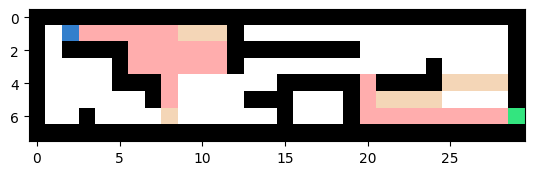

In [2]:
mapa = """
##############################
# o------...#                #
# ####------########         #
#    #------#           #    #
#    ###-      #####-####....#
#      #-    ###   #-....    #
#  #    .      #   #---------x
##############################
"""

ent = Maze(mapa)
ent.draw()

También podemos ver que el costo de esta configuración del mapa hará que si el agente se mueve a la derecha se tenga un costo de 3, pues se moverá a una región de alto tráfico (rojo intenso), mientras que si se mueve a la izquierda el costo será de 1, pues se mueve a una región sin tráfico.

In [3]:
#Movimiento a la derecha
r_state = ent.result(ent.initial, "right")
print("Costo (derecha): {}".format(ent.cost(ent.initial, "right", r_state)))
#Movimiento a la izquierda
l_state = ent.result(ent.initial, "left")
print("Costo (izquierda): {}".format(ent.cost(ent.initial, "left", l_state)))

Costo (derecha): 3
Costo (izquierda): 1


Así, además de encontrar un camino corto, se buscará minimizar el tiempo que se pasa en el tráfico, por lo que la solución óptima no sólo dependerá de la distancia del agente al estado final.